# 38 - Clustering: K-Means


* En este Notebook vamos a ver como solucionar problemas de ***Clusterización con la técnica del K-Means*** y como se implementa.


* Vamos a tratar los siguientes puntos:
<span></span><br>
    1. [Clustering](#M1)
<span></span><br>
    2. [K-Means](#M2)
<span></span><br>
    3. [Pseudocódigo del K-Means](#M3)
<span></span><br>
    4. [Implementación: K-Means](#M4)
<span></span><br>
    5. [Ejemplo de Clustering](#M5)
<span></span><br>
    6. [Resultados](#M6)


<hr>



# <a name="M1">1. Clustering</a>


* El ***Clustering*** es una ***tarea***; dentro del ***aprendizaje NO SUPERVISADO***, que consiste en ***agrupar un conjunto de objetos (no etiquetados) en subconjuntos de objetos llamados Clusters***.


* ***Cada Cluster está formado por una colección de objetos que son similares (o se consideran similares) entre sí, pero que son distintos respecto a los objetos de otros Clusters***.


<img src="./imgs/40_01_cl.png" style="width: 500px;"/>


* Para el ***Clustering, solo disponemos de un conjunto de datos de entrada (aprendizaje NO SUPEERVISADO)***, sobre los que ***debemos obtener información sobre la estructura del dominio de salida***, que es una información de la cual no se dispone.


* En el Clustering definimos:
<span></span><br><br>
    + **<span style="font-size:18px">Cluster</span>**: Conjunto de objetos que son similares entre sí.
<span></span><br><br>  
    + **<span style="font-size:18px">Clustering</span>**: Tarea de dividir un conjunto de objetos en subconjuntos de objetos (Clusters) similares entre sí.

<hr>


# <a name="M2">2. K-Means</a>


* El ***K-Means es un método de Clustering que separa <span style="color:red">‘K’ grupos de objetos</span> (Clusters) de similar varianza, minimizando un concepto conocido como inercia.***


<img src="./imgs/40_02_cl.png" style="width: 700px;"/>


* La ***Inercia es la suma de las distancias al cuadrado de cada objeto del Cluster a un punto ‘μ’ conocido como <span style="color:red">Centroide</span>*** (punto medio de todos los objetos del Cluster).

<span style="font-size:20px">$$Inercia = \sum_{i=0}^{N} \left \| x_i - \mu  \right \|^{2}$$</span>


* El algoritmo del K-Means tiene como objetivo ***elegir ‘K’ centroides que reduzcan al mínimo la inercia***:

<span style="font-size:20px">$$\underset{K}{argmin} \sum_{j=1}^{k}\sum_{x_i \in  c_j}\left \| x_i - \mu  \right \|^{2}$$</span>

<hr>


# <a name="M3">3. Pseudocódigo del K-Means</a>


* El algoritmo del K-Means funciona de la siguiente manera:

    1. ***Inicialización***: Elige un centroide para cada uno de los ‘k’ Cluster. Lo puede elegir bien de forma aleatoria, eligiendo ‘k’ puntos del dataset al azar, etc.
<span></span><br><br>
    2. ***Loop***: Asignación-Actualización hasta converger:
<span></span><br><br>
        * ***Asignación***: Se asigna cada objeto del dataset al Cluster más cercano, aplicando alguna medida de distancia (como por ejemplo la distancia euclídea) entre el objeto y el centroide del Cluster.
<span></span><br><br>
        <span style="font-size:20px">$$d_e(X,\mu ) = \sqrt{\sum_{i=1}^{n} (x_i - \mu_i)^2}$$</span>
<span></span><br><br>
        * ***Actualización***: Calcula los nuevos centroides, haciendo la media de los objetos que forman el Cluster.
<span></span><br><br>
        <span style="font-size:20px">$$\mu = \frac{1}{N} \sum_{j=1}^{N} x_j $$</span>



* Un ejemplo visual de como se haría el Clustering para agrupar elementos definidos por dos variables (coordenadas), sería:

<img src="./imgs/40_03_cl.png" style="width: 900px;"/>


* Veamos a continuación el Pseudocódigo:


```python
num_clusters = N
num_iteraciones = 100
condicion_parada = False

# Inicializamos los 'N' Clusters: por ejemplo asinando como centroides 'N' elementos seleccionados al azar
centroides_clusters = random_list(num_clusters)

it_counter
while not condicion_parada and it_counter < num_iteraciones:
    
    # Creo una variable para guardar el estado de los Clusters Anteriores
    centroides_old = centroides_clusters
    
    # Actualización
    for elemento in dataset:
        distancia_centroides = lista(num_clusters)
        for index, centroide in centroides_old:
            distancia_centroides[index] = distancia_euclidea(elemento, centroide)
        elementos_clusters[argmin(distancia_centroides)].append(elemento)
    
    
    # Asignacion
    for index, centroide_cluster in centroides_clusters:
        centroides_clusters = avg(elementos_clusters[index])
        
    it_counter+= 1

```

<hr>


# <a name="M4">4. Implementación: K-Means</a>


* En el siguiente fragmento de código está implementado el ***K-Means***, siguiendo el Pseudocódigo mostrado anteriormente junto con alguna lógica programática adicional.



In [1]:
import numpy as np
from scipy.spatial import distance

def print_iteration_status(iteracion_num, centroides_clusters, elementos_clusters):
    """
    Función que imprime por pantalla el estado de los Clsuters por iteracion
        - iteracion_num: número del epoch.
        - centroides_clusters: Valores de los centroides del Cluster
        - elementos_clusters: Elementos que hay en cada Cluster
    """
    print('\nITERATION {}'.format(iteracion_num))
    for index, elem in enumerate(centroides_clusters):
        print('\tCluster {}'.format(index + 1))
        print('\t\tNúmero de elementos en el Cluster {}'.format(len(elementos_clusters[index])))
        print('\t\tCentroide: {}'.format(elem))


def k_means(X, num_clusters, num_iteraciones, verbose=False):
    """
    Función que devuelve el modelo o hipótesis de la Clusterización (estado final de los Clusters),
    recibiendo como parámetros:
        - X: Elementos
        - num_clusters: Número de Clusters
        - num_iteraciones: Número de Iteraciones máximas a ejecutar
        - verbose: Boolean para indicar si queremos imprimir por pantalla el estado de la iteracion
    """
    # Inicializamos los centroides de los Clusters de forma aleatoria
    centroides_clusters = np.array([X[i] for i in np.random.choice(X.shape[0], num_clusters)])

    converge = False
    it_counter = 0
    while (not converge) and (it_counter < num_iteraciones):

        # Inicializamos una lista de los elementos que formarán el Cluster
        elementos_clusters = [[] for i in range(num_clusters)]

        # Creamos una copia de los centroides de la iteración anterior
        centroides_clusters_old = centroides_clusters.copy()

        # Asignacion
        for elem in X:
            distancia_centroides = np.zeros(len(centroides_clusters_old))
            for index, centroide in enumerate(centroides_clusters_old):
                distancia_centroides[index] = distance.euclidean(elem, centroide)
            elementos_clusters[np.argmin(distancia_centroides)].append(elem)

        # Actualización
        for index, centroide in enumerate(centroides_clusters_old):
            centroides_clusters[index] = np.asarray([sum(i) for i in zip(*elementos_clusters[index])]) / len(
                elementos_clusters[index])

        # Condición de parada, si los Nuevos centroides son iguales que los anteriores
        converge = [np.array_equal(centroides_clusters[index], centroides_clusters_old[index])
                    for index, elem in enumerate(centroides_clusters)].count(False) == 0

        # Incremento Iteracion
        it_counter += 1

        # Imprimimos por pantalla el estado de los Clusters
        if verbose:
            print_iteration_status(it_counter, centroides_clusters, elementos_clusters)
    
    return centroides_clusters, elementos_clusters

<hr>


# <a name="M5">5. Ejemplo de Clustering</a>



* Dado un ***conjunto de datos*** que tiene dos variables numéricas, vamos a agruparlas en 3 grupos o Clusters.


* Este conjunto de datos se encuentra en: ***'./data/DS_3Clusters_999Puntos.txt'***


* En primer lugar vamos a cargar los datos.


In [2]:
import pandas as pd

df = pd.read_table('./data/DS_3Clusters_999Puntos.txt', sep='::', header=None, names=['X1', 'X2'], engine='python')
df.sample(4)

,X1,X2
462,1.987217,2.075017
160,1.579107,1.683219
651,1.729299,3.057628
525,1.844920,1.860920


* Representando estos datos en una gráfica de dispersión, podemos distinguir 3 grupos (clusters) de puntos.

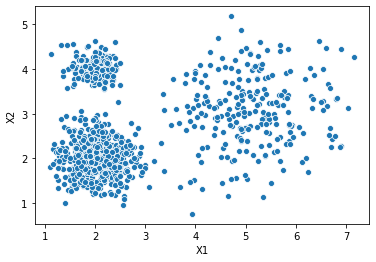

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

sns.scatterplot(x="X1", y="X2", data = df)

* Vamos a ejecutar el K-Means para obtener los centroides de los clusters pasandole los siguientes parámetros:
    + ***Número de Clusters*** = 3
    + ***Número Máximo de Iteracciones*** = 100

In [4]:
# Leemos los datos
X = np.loadtxt('./data/DS_3Clusters_999Puntos.txt', delimiter='::')

# Ejecutamos el k_means
np.random.seed(1)
centroides, elementos_cluster = k_means(X=X, num_clusters=3, num_iteraciones=100, verbose=True)


ITERATION 1
	Cluster 1
		Número de elementos en el Cluster 561
		Centroide: [1.968402   2.15292836]
	Cluster 2
		Número de elementos en el Cluster 147
		Centroide: [2.00243953 4.09445674]
	Cluster 3
		Número de elementos en el Cluster 291
		Centroide: [4.68543947 2.83052368]

ITERATION 2
	Cluster 1
		Número de elementos en el Cluster 572
		Centroide: [2.03174321 2.0025339 ]
	Cluster 2
		Número de elementos en el Cluster 187
		Centroide: [1.99921067 4.01443525]
	Cluster 3
		Número de elementos en el Cluster 240
		Centroide: [5.10868962 3.07171485]

ITERATION 3
	Cluster 1
		Número de elementos en el Cluster 574
		Centroide: [2.04172578 1.99650307]
	Cluster 2
		Número de elementos en el Cluster 191
		Centroide: [2.02022231 4.00032196]
	Cluster 3
		Número de elementos en el Cluster 234
		Centroide: [5.14650411 3.09105165]

ITERATION 4
	Cluster 1
		Número de elementos en el Cluster 575
		Centroide: [2.04429024 1.99783017]
	Cluster 2
		Número de elementos en el Cluster 191
		Centroide: [2.0

* Vamos a mostrar el estado final de los Clusters y el número de elementos que hay en cada uno de ellos:

In [5]:
print('RESULTADO FINAL:')
print_iteration_status(iteracion_num='-', centroides_clusters=centroides, elementos_clusters=elementos_cluster)

RESULTADO FINAL:

ITERATION -
	Cluster 1
		Número de elementos en el Cluster 575
		Centroide: [2.04429024 1.99783017]
	Cluster 2
		Número de elementos en el Cluster 191
		Centroide: [2.02022231 4.00032196]
	Cluster 3
		Número de elementos en el Cluster 233
		Centroide: [5.15350073 3.09247426]


<hr>


# <a name="M6">6. Resultados</a>


* Podemos observar como el K-Means no ha agrupado los elementos que son similares entre sí en un mismo Cluster.
    - Cluster 1: Rojo
    - Cluster 2: Azul
    - Cluster 3: Verde

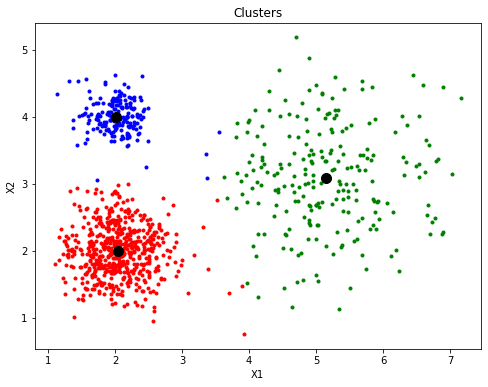

In [6]:
# Creamos la gráfica
fig, ax =  plt.subplots(figsize=(8, 6))
ax.set_title('Clusters')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# Dibujamos los elementos de cada Cluster
plt.plot(np.array(elementos_cluster[0])[:, 0], np.array(elementos_cluster[0])[:, 1], linestyle='None', color='red', marker='.')
plt.plot(np.array(elementos_cluster[1])[:, 0], np.array(elementos_cluster[1])[:, 1], linestyle='None', color='blue', marker='.')
plt.plot(np.array(elementos_cluster[2])[:, 0], np.array(elementos_cluster[2])[:, 1], linestyle='None', color='green', marker='.')

# Dibujamos los centroides
plt.plot(np.array(centroides[:, 0]), np.array(centroides[:, 1]), 'o', color='black', markersize=10)
plt.show()

<hr>

*Este Notebook ha sido desarrollado por **Ricardo Moya García** y registrado en Safe Creative como ***Atribución-NoComercial-CompartirIgual***.*

<img src="./imgs/CC_BY-NC-SA.png" alt="CC BY-NC">